In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [7]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(['Species'], axis=1)
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [8]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [14]:
width = dataset.shape[1]

X = dataset[:,0:width-3]
y = dataset[:,width-3:width]

7


In [17]:
#Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [19]:
#split dataset

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)

In [25]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4, )),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax'),
])

In [26]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0839 - accuracy: 0.9714 - val_loss: 0.0899 - val_accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0832 - accuracy: 0.9714 - val_loss: 0.0948 - val_accuracy: 0.9778
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0817 - accuracy: 0.9714 - val_loss: 0.0974 - val_accuracy: 0.9778
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0819 - accuracy: 0.9714 - val_loss: 0.0933 - val_accuracy: 0.9778
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0806 - accuracy: 0.9714 - val_loss: 0.0881 - val_accuracy: 0.9778
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0806 - accuracy: 0.9714 - val_loss: 0.0819 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0804 - accuracy: 0.9619 - val_loss: 0.0726 - val_accuracy: 0.9778
Epoch 8/100
4/4 [===

In [51]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9778


[0.04509342089295387, 0.9777777791023254]

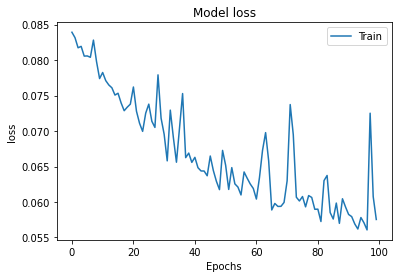

In [52]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.show()

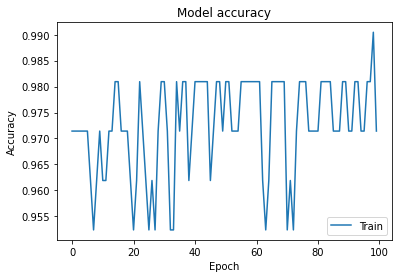

In [53]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

In [54]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


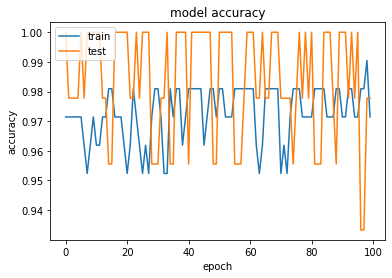

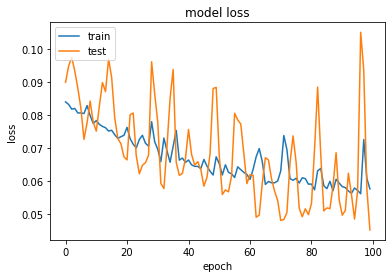

In [57]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()